In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = './input/Assignment_Dataset.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,tour_id,match_no,team_id,team_name,home_away,opponent_id,opponent_name,player_id,player_name,position,...,passes_across,short_passes,short_passes_succ,short_passes_accuracy,medium_passes,medium_passes_succ,medium_passes_accuracy,long_passes,long_passes_succ,long_passes_accuracy
0,1,1,1,Team1,H,2,Team2,1,Player001,LD,...,20,13,10,77,34,28,82,0,0,0
1,1,1,1,Team1,H,2,Team2,2,Player002,CD,...,28,4,4,100,46,43,93,5,2,40
2,1,1,1,Team1,H,2,Team2,3,Player003,CM,...,22,12,8,67,31,24,77,6,5,83
3,1,1,1,Team1,H,2,Team2,4,Player004,CM,...,23,7,5,71,24,17,71,1,1,100
4,1,1,1,Team1,H,2,Team2,5,Player005,AML,...,11,11,6,55,16,14,88,4,3,75


In [4]:
df.shape

(4858, 59)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 59 columns):
tour_id                    4858 non-null int64
match_no                   4858 non-null int64
team_id                    4858 non-null int64
team_name                  4858 non-null object
home_away                  4857 non-null object
opponent_id                4858 non-null int64
opponent_name              4858 non-null object
player_id                  4858 non-null int64
player_name                4858 non-null object
position                   4847 non-null object
minutes                    4858 non-null int64
goals                      4858 non-null int64
assists                    4858 non-null int64
yellows                    4858 non-null int64
reds                       4858 non-null int64
shots                      4858 non-null int64
shots_on                   4858 non-null int64
shots_off                  4858 non-null int64
shots_accuracy             4858 non-null i

In [6]:
## Create filters with player_id from excel files
xls = pd.ExcelFile("./input/Assignment Output Excel.xlsx")
## Masks
atack_ids = pd.read_excel("./input/Assignment Output Excel.xlsx",header=1,index_col=0).reset_index().drop('index',axis=1)['Player ID']
def_ids = pd.read_excel(xls, 'Defending_Stats',header=1,index_col=0).reset_index().drop('index',axis=1)['Player ID']

In [7]:
## Sort Mask values

atack_ids = atack_ids.sort_values()
def_ids = def_ids.sort_values()

In [8]:
## Separate Leagues
df_l1 = df[df.tour_id==1]
df_l2 = df[df.tour_id==2]

# 1.0 - Analysis - Attacking Stats

In [29]:
## Group by player_id and sum

aux = df_l1.groupby(['player_id']).sum() ## Aux dataframe for league 1
aux2 = df_l2.groupby(['player_id']).sum() ## Aux dataframe for league 2

In [30]:
## Create output dataframes following the player_id as index
out_atk_l1 = pd.DataFrame(index=aux.index)
out_atk_l2 = pd.DataFrame(index=aux2.index)

In [31]:
## Create Features for all League 1 players

out_atk_l1['mins_goal'] = aux['minutes']/aux['goals'] ## Min/goals
out_atk_l1['shots_goal'] = aux['shots']/aux['goals'] ## shots/goal
out_atk_l1['keypasses_passes'] = aux['key_passes']/aux['passes'] ## Keypasses/passes
out_atk_l1['forward_backward'] = aux['passes_forward']/aux['passes_back'] ## Forward Passes/Backward passes
out_atk_l1['total_goals'] = aux['goals'] ## Total Goals


In [32]:
## Create Features for all League 2 players

out_atk_l2['mins_goal'] = aux2['minutes']/aux2['goals'] ## Min/goals
out_atk_l2['shots_goal'] = aux2['shots']/aux2['goals'] ## shots/goal
out_atk_l2['keypasses_passes'] = aux2['key_passes']/aux2['passes'] ## Keypasses/passes
out_atk_l2['forward_backward'] = aux2['passes_forward']/aux2['passes_back'] ## Forward Passes/Backward passes
out_atk_l2['total_goals'] = aux2['goals'] ## Total Goals


In [33]:
out_atk_l1.reset_index(inplace=True)
out_atk_l2.reset_index(inplace=True)

In [34]:
## Concatenate all players on one DF with atack stats 
out_atk_all = pd.concat([out_atk_l1, out_atk_l2],axis=0).reset_index()

In [35]:
output_atk = out_atk_all[out_atk_all.player_id.isin(atack_ids)].reset_index().drop(['level_0','index'],axis=1)

In [36]:
len(atack_ids), len(output_atk) ## Different sizes

(338, 340)

### Players who played in both leagues

- Player_ID = 284  --> Player_Name = 310
- Player_ID = 156  --> Player_Name = 156

**For individual stats I will sum their data, but for league analysis maybe I will have to separate**

In [37]:
output_atk = output_atk.groupby('player_id').sum().reset_index()
len(output_atk), len(atack_ids) ## Now with same size

(338, 338)

In [38]:
## Replace inf by NaN
output_atk.replace([-np.inf,np.inf],np.nan,inplace=True)

In [39]:
## Check Data Types
output_atk.dtypes

player_id             int64
mins_goal           float64
shots_goal          float64
keypasses_passes    float64
forward_backward    float64
total_goals           int64
dtype: object

# 1.1 - Analysis - Defense Stats

In [40]:
out_def_l1 = pd.DataFrame(index=aux.index)
out_def_l2 = pd.DataFrame(index=aux2.index)

In [41]:
## Create Def Features for all players on league 1

out_def_l1['mins_tackle'] = aux.minutes/aux.tackles
out_def_l1['recover_lost'] = aux.recovered_balls/aux.lost_balls
out_def_l1['discipline'] = aux.yellows/(aux.reds*3)
out_def_l1['forward_backward'] = aux.passes_forward/aux.passes_back
out_def_l1['challenges'] = aux.challenges

In [42]:
## Create Def Features for all players on league 2

out_def_l2['mins_tackle'] = aux2.minutes/aux2.tackles
out_def_l2['recover_lost'] = aux2.recovered_balls/aux2.lost_balls
out_def_l2['discipline'] = aux2.yellows/(aux.reds*3)
out_def_l2['forward_backward'] = aux2.passes_forward/aux2.passes_back
out_def_l2['challenges'] = aux2.challenges

In [43]:
out_def_all = pd.concat([out_def_l1,out_def_l2],axis=0).reset_index()

In [44]:
output_def = out_def_all[out_def_all.player_id.isin(def_ids)]

In [45]:
len(output_def),len(def_ids) ## Different sizes

(180, 179)

In [46]:
output_def[output_def.duplicated(subset=['player_id'])]

,player_id,mins_tackle,recover_lost,discipline,forward_backward,challenges
295,13,50.583333,2.25,inf,6.5,49


### Players who played in both leagues

- Player_ID = 13  --> Player_Name = 013

**For individual stats I will sum their data, but for league analysis maybe I will have to separate**

In [47]:
output_def = output_def.groupby('player_id').sum().reset_index()

In [48]:
len(output_def), len(def_ids) ## Same sizes

(179, 179)

In [49]:
output_def.replace([-np.inf, np.inf],np.nan, inplace=True)

In [50]:
output_def.dtypes

player_id             int64
mins_tackle         float64
recover_lost        float64
discipline          float64
forward_backward    float64
challenges            int64
dtype: object

## 1.2 - Export Data

In [51]:
with pd.ExcelWriter('./output/output.xlsx') as writer: 
    output_def.to_excel(writer,sheet_name='defense',header=True,index=None)
    output_atk.to_excel(writer,sheet_name='atack',index=None,header=True)

# 2.0 - Data Visualization - Top Scorers

In [64]:
top_scorers_l1 = out_atk_l1.sort_values(by=['total_goals'], ascending=False).head()
top_scorers_l2 = out_atk_l2.sort_values(by=['total_goals'],ascending=False).head()

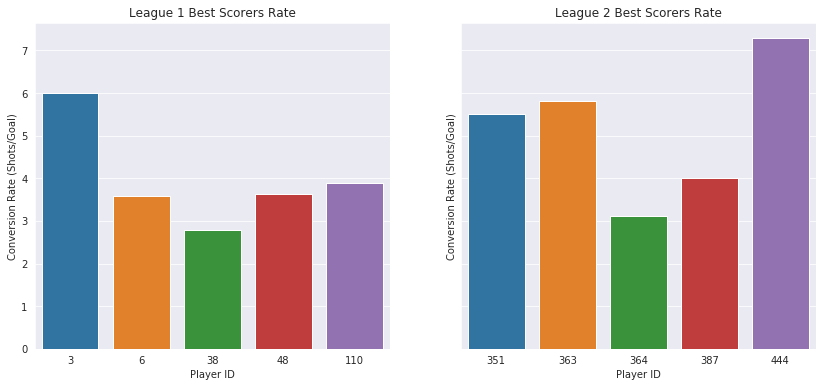

In [73]:
sns.set_style('darkgrid')
f, axes = plt.subplots(1, 2,sharey=True,figsize=(14,6))
sns.barplot(x='player_id', y='shots_goal',data=top_scorers_l1, ax=axes[0])
sns.barplot(x='player_id', y='shots_goal',data=top_scorers_l2, ax=axes[1])
axes[0].set_title('League 1 Best Scorers Rate')
axes[1].set_title('League 2 Best Scorers Rate')
for ax in axes.flat:
    ax.set(xlabel='Player ID', ylabel='Conversion Rate (Shots/Goal)')

# 2.1 - Data Visualization - Top Defenders

In [79]:
## Add features to plot

## League 1
out_def_l1['aerial_duels'] = aux['aerial_duels']
out_def_l1['tackles'] = aux['tackles']

## League 2
out_def_l2['aerial_duels'] = aux2['aerial_duels']
out_def_l2['tackles'] = aux2['tackles']

In [83]:
top_def_l1 = out_def_l1.sort_values(by=['challenges'],ascending=False).reset_index('player_id').head()
top_def_l2 = out_def_l2.sort_values(by=['challenges'],ascending=False).reset_index('player_id').head()

Text(0, 0.5, 'Count')

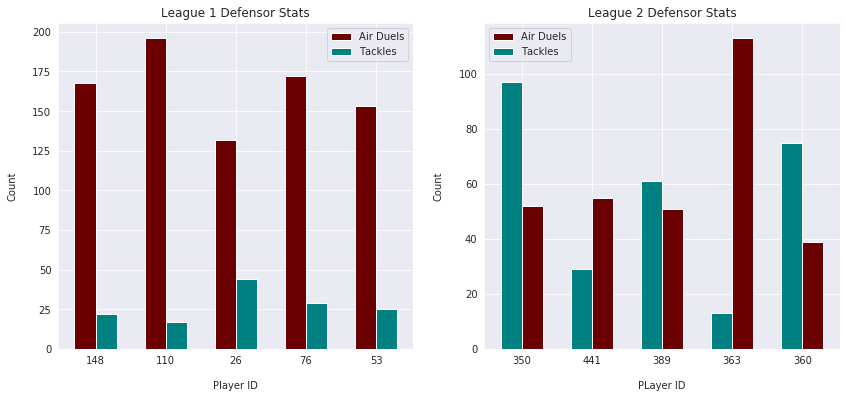

In [85]:
fig, ax = plt.subplots(ncols=2,figsize=(14,6))

x1 = np.arange(len(top_def_l1))
x2 = np.arange(len(top_def_l2))

barWidth = 0.30

bars1 = top_def_l1['aerial_duels']
bars2 = top_def_l1['tackles']

bars3 = top_def_l2['aerial_duels']
bars4 = top_def_l2['tackles']

ax[0].bar(x1, bars1, color='#6b0001', width=barWidth, edgecolor='white', label='Air Duels')
ax[0].bar(x1+barWidth, bars2, color='#008080', width=barWidth, edgecolor='white', label='Tackles')


ax[1].bar(x2+barWidth, bars3, color='#6b0001', width=barWidth, edgecolor='white', label='Air Duels')
ax[1].bar(x2, bars4, color='#008080', width=barWidth, edgecolor='white', label='Tackles')

# Fix the x-axes.
ax[0].set_xticks(x1 + barWidth / 2)
ax[0].set_xticklabels(top_def_l1['player_id'])
ax[1].set_xticks(x2 + barWidth / 2)
ax[1].set_xticklabels(top_def_l2['player_id'])

ax[0].legend()
ax[1].legend()

ax[0].set_title('League 1 Defensor Stats')
ax[1].set_title('League 2 Defensor Stats')

ax[0].set_xlabel('Player ID', labelpad=15)
ax[0].set_ylabel('Count', labelpad=15)
ax[1].set_xlabel('PLayer ID', labelpad=15)
ax[1].set_ylabel('Count', labelpad=15)